In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from matplotlib import font_manager, rc
import platform
import json
import folium
if platform.system() == "Windows" :
    path = "c:/Windows/Fonts/Malgun.ttf"
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc("font", family = font_name)
elif platform.system() == "Drawin" :
    rc("font",family = "AppleGothic")
else :
    print("check your OS system...")
plt.rcParams["axes.unicode_minus"] = False
from bs4 import BeautifulSoup
import requests
from openpyxl.workbook import Workbook
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

# 2017-2019 년월별 방문지역

In [2]:
#파일불러오기
file_path = "./file/2017년_변수정리 (1).csv"
df= pd.read_csv(file_path,encoding="euc=kr")
df_2017=df
df_2017

,Q1,Q2A1,Q2A2,Q2A3,Q2A4,Q2A5,Q5_2A1,Q5_2A2,Q5_2A3,Q9_2A1,...,Q10_1B15,Q10_1B3,Q10_1B7,Q10_1B2,Q10_1B5,Q10_1B12,Q10_1B13,Q10_1B16,CQ14_2_7,D_YEAR
0,1,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2017-03
1,18,NaN,2.0,NaN,NaN,NaN,3.0,4.0,2.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,1,2017-11
2,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,...,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,1,2017-06
3,2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3,2017-02
4,1,1.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2017-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13819,1,NaN,NaN,3.0,NaN,NaN,12.0,3.0,13.0,1,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1,2017-12
13820,1,NaN,NaN,3.0,NaN,NaN,3.0,2.0,4.0,1,...,15.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1,2017-12
13821,3,NaN,NaN,3.0,NaN,NaN,7.0,3.0,2.0,3,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1,2017-12
13822,1,NaN,NaN,3.0,NaN,NaN,4.0,2.0,3.0,1,...,15.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1,2017-12


In [3]:
#값고치기
dic1={}
w_list = [1,4,8,9,6,10,11,17,14,15,3,7,2,5,12,13,16]
for i in range(1,18) :
    dic1["Q10_1B{}".format(i)]="Q10_1B{}".format(w_list[i-1])

df.rename(columns = dic1,inplace=True)

In [4]:
#년,월 구분하기
df["YEAR"] = np.nan
for i in range(len(df)) :
    df.loc[i,"YEAR"] = df["D_YEAR"][i][:4]
    
df["MONTH"] = np.nan
for i in range(len(df)) :
    df.loc[i,"MONTH"] = df["D_YEAR"][i][5:]

In [5]:
#Q10_1B1-Q10_1B17합치기
df_year_loc1 = None
for i in range(1,18):
    visit8 = pd.DataFrame(df_2017[['YEAR', 'Q10_1B{}'.format(i)]].value_counts())
    year_v8 = visit8.reset_index()
    year_v8 = year_v8.rename(columns={'Q10_1B{}'.format(i):'Q10_1B'})
    df_year_loc1 = pd.concat([df_year_loc1, year_v8],ignore_index=True)
print(df_year_loc1)

    YEAR  Q10_1B  count
0   2017     1.0  11221
1   2017    13.0    121
2   2017    11.0    195
3   2017     2.0   2307
4   2017    14.0    405
5   2017     5.0    190
6   2017    12.0    218
7   2017     3.0    397
8   2017     4.0   1566
9   2017     6.0    272
10  2017     7.0    240
11  2017    15.0    340
12  2017    16.0   1289
13  2017     9.0   1240
14  2017    10.0    138
15  2017    17.0     69
16  2017     8.0   2411


In [6]:
#파일 불러오기
file_path = "./files/2017-2019_통합본.csv"
df1= pd.read_csv(file_path)
df_1819=df1.copy()

In [7]:
#년,월구분하기
df["YEAR"] = np.nan
for i in range(len(df_1819)) :
    df_1819.loc[i,"YEAR"] = df_1819["D_YEAR"][i][:4]
    
df["MONTH"] = np.nan
for i in range(len(df_1819)) :
    df_1819.loc[i,"MONTH"] = df_1819["D_YEAR"][i][5:]

In [8]:
abc=df_1819.copy()
abc

,Q1,Q2A1,Q2A2,Q2A3,Q2A4,Q2A5,Q5_2A1,Q5_2A2,Q5_2A3,Q9_2A1,...,Q10_1B12,Q10_1B13,Q10_1B14,Q10_1B15,Q10_1B16,Q10_1B17,CQ14_2_7,D_YEAR,YEAR,MONTH
0,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2017-03,2017,03
1,18.0,NaN,2.0,NaN,NaN,NaN,3.0,4.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,17.0,1.0,2017-11,2017,11
2,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,...,NaN,13.0,NaN,NaN,NaN,NaN,1.0,2017-06,2017,06
3,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2017-02,2017,02
4,1.0,1.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2017-08,2017,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43671,2.0,1.0,NaN,NaN,NaN,NaN,10.0,4.0,11.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2019-01,2019,01
43672,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2019-01,2019,01
43673,1.0,1.0,NaN,NaN,NaN,NaN,9.0,2.0,1.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2019-12,2019,12
43674,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2019-05,2019,05


In [9]:
#2017년 삭제
abc = abc.drop(abc[(abc['YEAR'] == '2017')].index)
abc

,Q1,Q2A1,Q2A2,Q2A3,Q2A4,Q2A5,Q5_2A1,Q5_2A2,Q5_2A3,Q9_2A1,...,Q10_1B12,Q10_1B13,Q10_1B14,Q10_1B15,Q10_1B16,Q10_1B17,CQ14_2_7,D_YEAR,YEAR,MONTH
13824,1.0,1.0,NaN,NaN,NaN,NaN,1.0,2.0,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2018-01,2018,01
13825,1.0,NaN,2.0,NaN,NaN,NaN,3.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2018-02,2018,02
13826,6.0,1.0,NaN,NaN,NaN,NaN,5.0,1.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2018-03,2018,03
13827,3.0,NaN,NaN,3.0,NaN,NaN,1.0,2.0,5.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2018-05,2018,05
13828,1.0,1.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2018-08,2018,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43671,2.0,1.0,NaN,NaN,NaN,NaN,10.0,4.0,11.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2019-01,2019,01
43672,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2019-01,2019,01
43673,1.0,1.0,NaN,NaN,NaN,NaN,9.0,2.0,1.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2019-12,2019,12
43674,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2019-05,2019,05


In [10]:
#Q10_1B1-Q10_1B17 합치기
df_year_loc = None
for i in range(1,18):
    visit8 = pd.DataFrame(abc[['YEAR', 'Q10_1B{}'.format(i)]].value_counts())
    year_v8 = visit8.reset_index()
    year_v8 = year_v8.rename(columns={'Q10_1B{}'.format(i):'Q10_1B'})
    df_year_loc = pd.concat([df_year_loc, year_v8],ignore_index=True)
print(df_year_loc)

    YEAR  Q10_1B  count
0   2019     1.0  12677
1   2018     1.0  11122
2   2019     2.0   2565
3   2018     2.0   2178
4   2019     3.0    590
5   2018     3.0    474
6   2019     4.0   1320
7   2018     4.0   1244
8   2019     5.0    224
9   2018     5.0    164
10  2019     6.0    272
11  2018     6.0    260
12  2019     7.0    213
13  2018     7.0    212
14  2019     8.0   3052
15  2018     8.0   2278
16  2018     9.0   1910
17  2019     9.0   1868
18  2019    10.0    158
19  2018    10.0    107
20  2019    11.0    225
21  2018    11.0    184
22  2019    12.0    286
23  2018    12.0    173
24  2019    13.0    156
25  2018    13.0    109
26  2019    14.0    557
27  2018    14.0    430
28  2019    15.0    371
29  2018    15.0    327
30  2019    16.0   1279
31  2018    16.0   1142
32  2019    17.0     69
33  2018    17.0     68


In [11]:
#17년,18-19년 데이터 합치기
df_class1_summary = pd.concat([df_year_loc, df_year_loc1], axis = 0)

In [12]:
#변수명 바꾸기
gg_dic = {1: '서울',2: '부산',3: '대구',
            4: '인천',5: '광주',6: '대전',
            7: '울산',8: '경기',9: '강원',
            10: '충북',11: '충남',12: '전북',
            13: '전남',14: '경북',15: '경남',
            16: '제주',17: '세종'}

df_class1_summary['Q10_1B'] = df_class1_summary['Q10_1B'].replace(gg_dic)

In [13]:
df_class1_summary

,YEAR,Q10_1B,count
0,2019,서울,12677
1,2018,서울,11122
2,2019,부산,2565
3,2018,부산,2178
4,2019,대구,590
5,2018,대구,474
6,2019,인천,1320
7,2018,인천,1244
8,2019,광주,224
9,2018,광주,164


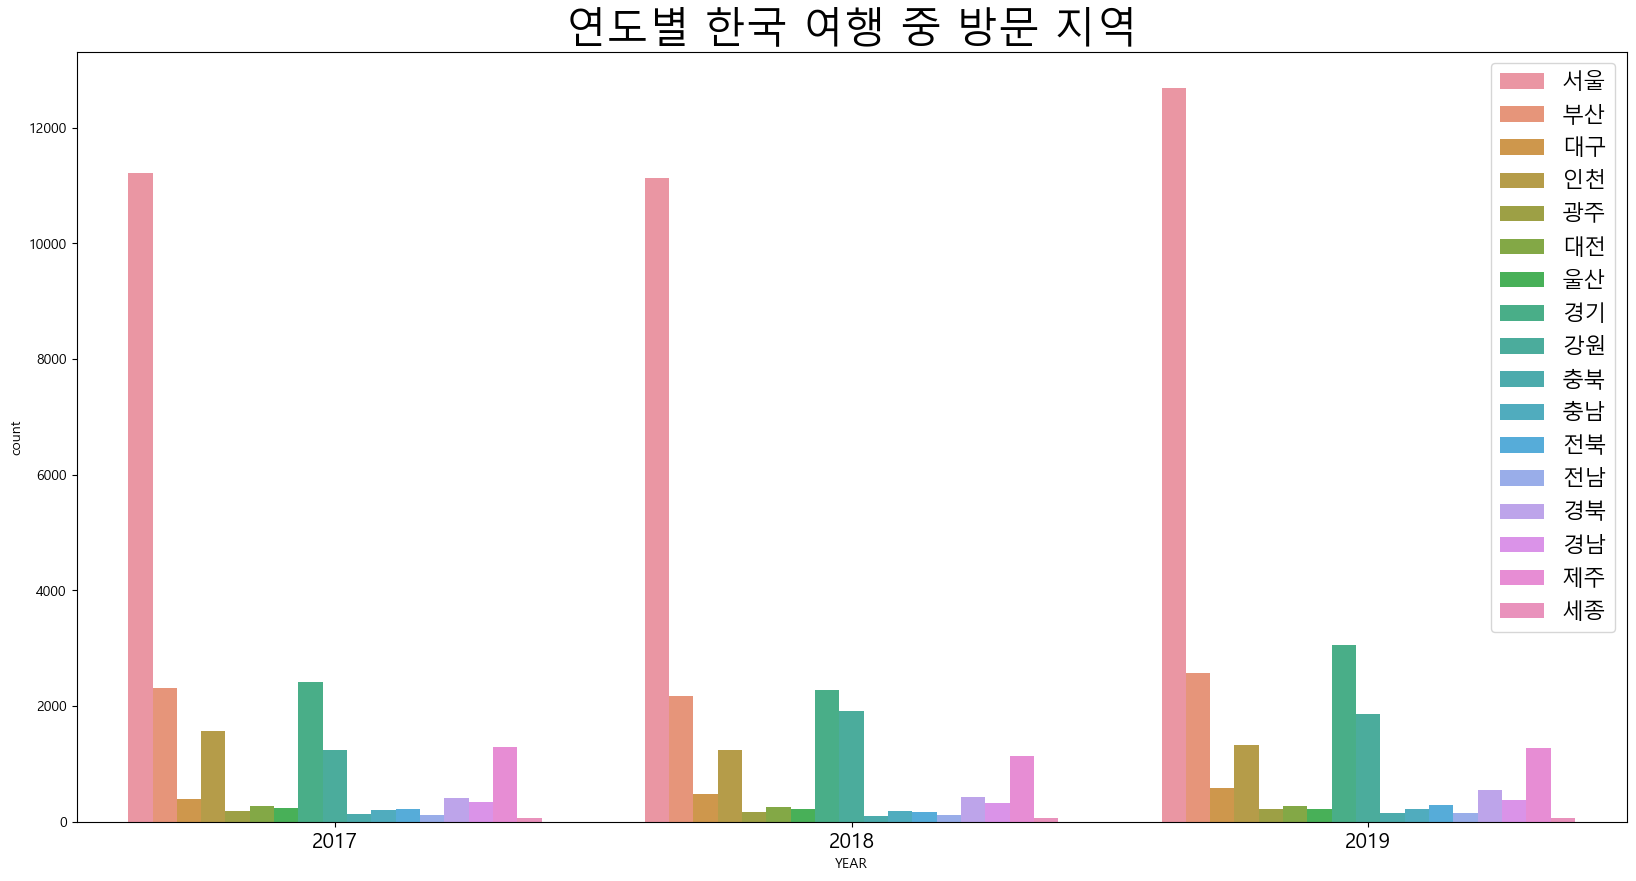

In [14]:
#연도별 한국 여행 중 방문 지역 시각화
plt.figure(figsize=(20, 10))

sns.set_palette('husl')
sns.barplot(data=df_class1_summary,
            x="YEAR",
            y="count",
            hue="Q10_1B",order = ['2017', '2018', '2019'])

plt.xticks(fontsize=15)
plt.title('연도별 한국 여행 중 방문 지역',fontsize=30)
plt.legend(fontsize=16,bbox_to_anchor=(1, 1))

plt.show()

# 2017-2019 만족한활동1-3순위

In [ ]:
#파일불러오기
file_path = "./files/2017-2019_통합본(1).csv"
df= pd.read_csv(file_path)

In [ ]:
#파일카피
df1 = df.copy()
df2 = df.copy()

In [ ]:
#년월구분하기
df1["YEAR"] = np.nan
for i in range(len(df1)) :
    df1.loc[i,"YEAR"] = df1["D_YEAR"][i][:4]
    
df1["MONTH"] = np.nan
for i in range(len(df2)) :
    df1.loc[i,"MONTH"] = df1["D_YEAR"][i][5:]

## - 방한기간 중 활동 연도별, 국가별, 연령별, 성별 방한기간 중 만족한 활동 비교

In [ ]:
#범주 한글로 바꾸기
dic1 = {1: '일본',2: '중국' ,3: '홍콩',
4: '싱가포르',5: '대만',6: '태국',
7: '말레이시아',8: '호주' ,9: '미국',
10: '캐나다' ,11: '영국',12: '독일',
13: '프랑스',14: '러시아',15: '중동',
16: '인도',17: '필리핀',18: '인도네시아',
19: '베트남',97: '기타'}

dic2 = {1: '식도락 관광',2: '쇼핑',3: '자연경관 감상',4: '고궁/역사 유적지 방문',5: '전통문화체험',6: '박물관,전시관 방문',7: 'K-POP/한류스타 관련 공연장 및 드라마 촬영지 방문',8: '유흥/오락',9: '뷰티/의료관광',10: '스포츠/레저 관람 및 참가',11: '업무수행',12: '연수·교육·연구',13: '시찰',14: '기타'}

dict3 = {1: '15-20세', 2: '21-30세', 3: '31-40세', 4: '41-50세', 5: '51-60세', 6: '61세 이상'}

#국가 바꾸기 D_COU1'   
df1['D_COU1'] = df1['D_COU1'].replace(dic1)

#성별 바꾸기 'D_GEN'
df1["D_GEN"]=df1[["D_GEN"]].replace({'D_GEN':{1:'남성',2:'여성'}})

#가장만족한활동1-3 Q9_2A1-Q9_2A3
df1['Q9_2A1']=df1['Q9_2A1'].replace(dic2)
df1['Q9_2A2']=df1['Q9_2A2'].replace(dic2)
df1['Q9_2A3']=df1['Q9_2A3'].replace(dic2)

#연령바꾸기
df1["D_AGE"]=df1["D_AGE"].replace(dict3)

## 만족한활동1순위 top3와 국가top3

In [ ]:
df_abc = df1[(df1["Q9_2A1"] == '식도락 관광') | (df1["Q9_2A1"] == '쇼핑') | (df1["Q9_2A1"] == '업무수행')]
df_abc = df_abc[(df_abc["D_COU1"] == '일본') | (df_abc["D_COU1"] == '대만') | (df_abc["D_COU1"] == '중국')]
df_abc.reset_index(drop=True)

In [ ]:
#만족한활동1순위 top3 국가top3 년도별 성별 
df_2g = df_abc.groupby(['D_GEN', 'D_COU1',"Q9_2A1","YEAR"])
df_2g_count = pd.DataFrame(df_2g['ID'].count())
a = pd.DataFrame(df_2g_count.values)
df_2g_temp = pd.DataFrame(df_2g_count.index)
df_2g_temp = pd.concat([a, df_2g_temp],axis=1)
df_2g_temp.columns = ['count', 'cate']
df_2g_temp

df_2g2 = df_abc.groupby(['D_GEN', 'D_COU1',"Q9_2A1"])
df_2g_count2 = pd.DataFrame(df_2g2['ID'].count())
a = pd.DataFrame(df_2g_count2.values)
df_2g_temp2 = pd.DataFrame(df_2g_count2.index)
df_2g_temp2 = pd.concat([a, df_2g_temp2],axis=1)
df_2g_temp2.columns = ['count', 'cate']
df_2g_temp2

t_2017 = pd.DataFrame(df_2g_count.unstack()['ID']["2017"].values)
t_2018 = pd.DataFrame(df_2g_count.unstack()['ID']["2018"].values)
t_2019 = pd.DataFrame(df_2g_count.unstack()['ID']["2019"].values)

df_2g_year = pd.concat([t_2017, t_2018, t_2019], axis=1)
df_2g_year

df_2g_temp_1 = pd.concat([df_2g_temp2, t_2017], axis=1)
df_2g_temp_1['year'] = 2017

df_2g_temp_2 = pd.concat([df_2g_temp2, t_2018], axis=1)
df_2g_temp_2['year'] = 2018

df_2g_temp_3 = pd.concat([df_2g_temp2, t_2019], axis=1)
df_2g_temp_3['year'] = 2019

df_cc = pd.concat([df_2g_temp_1,df_2g_temp_2,df_2g_temp_3])

In [ ]:
#한국 방문 상위 3개국별 년도별 남녀 만족한 활동 1순위 시각화
plt.figure(figsize=(20, 10))

sns.set_palette('Set1')
sns.barplot(data=df_cc,
            x="cate",
            y=0,
            hue="year")
plt.title('한국 방문 상위 3개국별 남녀 만족한 활동 1순위 년도별 추이',fontsize=30)
plt.xticks(rotation =90, fontsize=15)
plt.legend(fontsize=16,bbox_to_anchor=(1.13, 1))

plt.show()

## 2순위

In [ ]:
#만족한활동2순위 top3와국가top3
df_abc = df1[(df1["Q9_2A2"] == '식도락 관광') | (df1["Q9_2A2"] == '쇼핑') | (df1["Q9_2A2"] == '자연경관 감상')]
df_abc = df_abc[(df_abc["D_COU1"] == '일본') | (df_abc["D_COU1"] == '대만') | (df_abc["D_COU1"] == '중국')]
df_abc.reset_index(drop=True)

In [ ]:
#만족한활동2순위 top3 국가top3 년도별 성별
df_2g = df_abc.groupby(['D_GEN', 'D_COU1',"Q9_2A2","YEAR"]) 
df_2g_count = pd.DataFrame(df_2g['ID'].count())
a = pd.DataFrame(df_2g_count.values)
df_2g_temp = pd.DataFrame(df_2g_count.index)
df_2g_temp = pd.concat([a, df_2g_temp],axis=1)
df_2g_temp.columns = ['count', 'cate']
df_2g_temp

df_2g2 = df_abc.groupby(['D_GEN', 'D_COU1',"Q9_2A2"]) 
df_2g_count2 = pd.DataFrame(df_2g2['ID'].count())
a = pd.DataFrame(df_2g_count2.values)
df_2g_temp2 = pd.DataFrame(df_2g_count2.index)
df_2g_temp2 = pd.concat([a, df_2g_temp2],axis=1)
df_2g_temp2.columns = ['count', 'cate']
df_2g_temp2

t_2017 = pd.DataFrame(df_2g_count.unstack()['ID']["2017"].values)
t_2018 = pd.DataFrame(df_2g_count.unstack()['ID']["2018"].values)
t_2019 = pd.DataFrame(df_2g_count.unstack()['ID']["2019"].values)

df_2g_year = pd.concat([t_2017, t_2018, t_2019], axis=1)
df_2g_year

df_2g_temp_1 = pd.concat([df_2g_temp2, t_2017], axis=1)
df_2g_temp_1['year'] = 2017

df_2g_temp_2 = pd.concat([df_2g_temp2, t_2018], axis=1)
df_2g_temp_2['year'] = 2018

df_2g_temp_3 = pd.concat([df_2g_temp2, t_2019], axis=1)
df_2g_temp_3['year'] = 2019

df_cc = pd.concat([df_2g_temp_1,df_2g_temp_2,df_2g_temp_3])

In [ ]:
#한국 방문 상위 3개국별 년도별 남녀 만족한 활동 2순위 시각화
plt.figure(figsize=(20, 10))
sns.set_palette('Set1')
sns.barplot(data=df_cc,
            x="cate",
            y=0,
            hue="year")
plt.xticks(rotation =90, fontsize=15)
plt.legend(fontsize=16,bbox_to_anchor=(1.13, 1))
plt.title('한국 방문 상위 3개국별 남녀 만족한 활동 2순위 년도별 추이',fontsize=30)

plt.show()

## 3순위

In [ ]:
df_abc = df1[(df1["Q9_2A3"] == '식도락 관광') | (df1["Q9_2A3"] == '쇼핑') | (df1["Q9_2A3"] == '자연경관 감상')]
df_abc = df_abc[(df_abc["D_COU1"] == '일본') | (df_abc["D_COU1"] == '대만') | (df_abc["D_COU1"] == '중국')]
df_abc.reset_index(drop=True)

In [ ]:
#만족한활동3순위 top3 국가top3 년도별 성별
df_2g = df_abc.groupby(['D_GEN', 'D_COU1',"Q9_2A3","YEAR"]) #,"Q5_2A2","Q5_2A3"
df_2g_count = pd.DataFrame(df_2g['ID'].count())
a = pd.DataFrame(df_2g_count.values)
df_2g_temp = pd.DataFrame(df_2g_count.index)
df_2g_temp = pd.concat([a, df_2g_temp],axis=1)
df_2g_temp.columns = ['count', 'cate']
df_2g_temp

df_2g2 = df_abc.groupby(['D_GEN', 'D_COU1',"Q9_2A3"]) #,"Q5_2A2","Q5_2A3"
df_2g_count2 = pd.DataFrame(df_2g2['ID'].count())
a = pd.DataFrame(df_2g_count2.values)
df_2g_temp2 = pd.DataFrame(df_2g_count2.index)
df_2g_temp2 = pd.concat([a, df_2g_temp2],axis=1)
df_2g_temp2.columns = ['count', 'cate']
df_2g_temp2

t_2017 = pd.DataFrame(df_2g_count.unstack()['ID']["2017"].values)
t_2018 = pd.DataFrame(df_2g_count.unstack()['ID']["2018"].values)
t_2019 = pd.DataFrame(df_2g_count.unstack()['ID']["2019"].values)

df_2g_year = pd.concat([t_2017, t_2018, t_2019], axis=1)
df_2g_year

df_2g_temp_1 = pd.concat([df_2g_temp2, t_2017], axis=1)
df_2g_temp_1['year'] = 2017

df_2g_temp_2 = pd.concat([df_2g_temp2, t_2018], axis=1)
df_2g_temp_2['year'] = 2018

df_2g_temp_3 = pd.concat([df_2g_temp2, t_2019], axis=1)
df_2g_temp_3['year'] = 2019

df_cc = pd.concat([df_2g_temp_1,df_2g_temp_2,df_2g_temp_3])

In [ ]:
df_cc

In [ ]:
#한국 방문 상위 3개국별 년도별 남녀 만족한 활동 3순위 시각화
plt.figure(figsize=(20, 10))
sns.set_palette('Set1')
sns.barplot(data=df_cc,
            x="cate",
            y=0,
            hue="year")
plt.xticks(rotation =90,fontsize=15)
plt.legend(fontsize=16,bbox_to_anchor=(1.13, 1))
plt.title('한국 방문 상위 3개국별 남녀 만족한 활동 3순위 년도별 추이',fontsize=30)
plt.show()

In [ ]:
#범주 한글로 바꾸기
gg_dic = {1: '서울',2: '부산',3: '대구',
            4: '인천',5: '광주',6: '대전',
            7: '울산',8: '경기',9: '강원',
            10: '충북',11: '충남',12: '전북',
            13: '전남',14: '경북',15: '경남',
            16: '제주',17: '세종'}

dic1 = {1: '일본',2: '중국' ,3: '홍콩',
4: '싱가포르',5: '대만',6: '태국',
7: '말레이시아',8: '호주' ,9: '미국',
10: '캐나다' ,11: '영국',12: '독일',
13: '프랑스',14: '러시아',15: '중동',
16: '인도',17: '필리핀',18: '인도네시아',
19: '베트남',97: '기타'}

df1['D_COU1'] = df1['D_COU1'].replace(dic1)

df1["Q10_1B1"]=df1["Q10_1B1"].replace(gg_dic)
df1["Q10_1B2"]=df1["Q10_1B2"].replace(gg_dic)
df1["Q10_1B3"]=df1["Q10_1B3"].replace(gg_dic)
df1["Q10_1B4"]=df1["Q10_1B4"].replace(gg_dic)
df1["Q10_1B5"]=df1["Q10_1B5"].replace(gg_dic)
df1["Q10_1B6"]=df1["Q10_1B6"].replace(gg_dic)
df1["Q10_1B7"]=df1["Q10_1B7"].replace(gg_dic)
df1["Q10_1B8"]=df1["Q10_1B8"].replace(gg_dic)
df1["Q10_1B9"]=df1["Q10_1B9"].replace(gg_dic)
df1["Q10_1B10"]=df1["Q10_1B10"].replace(gg_dic)
df1["Q10_1B11"]=df1["Q10_1B11"].replace(gg_dic)
df1["Q10_1B12"]=df1["Q10_1B12"].replace(gg_dic)
df1["Q10_1B13"]=df1["Q10_1B13"].replace(gg_dic)
df1["Q10_1B14"]=df1["Q10_1B14"].replace(gg_dic)
df1["Q10_1B15"]=df1["Q10_1B15"].replace(gg_dic)
df1["Q10_1B16"]=df1["Q10_1B16"].replace(gg_dic)
df1["Q10_1B17"]=df1["Q10_1B17"].replace(gg_dic)

In [ ]:
#국가별 가장 만족한 활동 1-3순위 히트맵 시각화
plt.rcParams["figure.figsize"]=(20,10)
m_list = ["Q9_2A1", "Q9_2A2", "Q9_2A3"]
for i in [0,1,2]:
    df_piv6 = df1.pivot_table(values="ID", index=m_list[i], columns="D_COU1", aggfunc="count")
    sns.heatmap(df_piv6,annot=True,fmt=".0f",cmap="rocket_r")
    plt.title("국가별 가장 만족한 활동 {}순위".format(i+1),fontsize=30)
    plt.xticks(fontsize=15,rotation=90)
    plt.yticks(fontsize=15)
    plt.show()

In [ ]:
# 국가별 가장 만족한 활동1~3순위
df_Q9 = pd.DataFrame(df1[['D_COU1', 'Q9_2A1']].value_counts())
df_Q9_2A1 = df_Q9.reset_index()
df_Q9_2A1

df_Q91 = pd.DataFrame(df1[['D_COU1', 'Q9_2A2']].value_counts())
df_Q9_2A2 = df_Q91.reset_index()
df_Q9_2A2

df_Q92 = pd.DataFrame(df1[['D_COU1', 'Q9_2A3']].value_counts())
df_Q9_2A3 = df_Q92.reset_index()
df_Q9_2A3

In [ ]:
#국가별 가장 만족한 활동1순위 막대그래프 시각화
plt.figure(figsize=(20, 10))
sns.set_palette('husl')
sns.barplot(df_Q9_2A1,
            x="D_COU1",
            y="count",
            hue="Q9_2A1")
plt.xticks(rotation =90,fontsize=15)
plt.legend(fontsize=16)
plt.legend(fontsize=16,bbox_to_anchor=(1, 1))
plt.title('국가별 가장 만족한 활동 1순위',fontsize=30)

plt.show()

In [ ]:
#국가별 가장 만족한 활동2순위 시각화
plt.figure(figsize=(20, 10))
sns.set_palette('husl')
sns.barplot(df_Q9_2A2,
            x="D_COU1",
            y="count",
            hue="Q9_2A2")
plt.legend(fontsize=16)
plt.xticks(rotation =90,fontsize=15)
plt.legend(fontsize=16,bbox_to_anchor=(1, 1))
plt.title('국가별 가장 만족한 활동 2순위',fontsize=30)

plt.show()

In [ ]:
#국가별 가장 만족한 활동3순위 시각화
plt.figure(figsize=(20, 10))
sns.set_palette('husl')
sns.barplot(df_Q9_2A3,
            x="D_COU1",
            y="count",
            hue="Q9_2A3")
plt.legend(fontsize=16)
plt.xticks(rotation =90,fontsize=15)
plt.legend(fontsize=16,bbox_to_anchor=(1, 1))
plt.title('국가별 가장 만족한 활동 3순위',fontsize=30)

plt.show()

In [ ]:
# 연령별 가장 만족한 활동1~3순위
df_Q9 = pd.DataFrame(df1[['D_AGE', 'Q9_2A1']].value_counts())
df_Q9_2A1_AGE = df_Q9.reset_index()
df_Q9_2A1_AGE

df_Q91 = pd.DataFrame(df1[['D_AGE', 'Q9_2A2']].value_counts())
df_Q9_2A2_AGE = df_Q91.reset_index()
df_Q9_2A2_AGE

df_Q92 = pd.DataFrame(df1[['D_AGE', 'Q9_2A3']].value_counts())
df_Q9_2A3_AGE = df_Q92.reset_index()
df_Q9_2A3_AGE

In [ ]:
#연령별 가장 만족한 활동1순위
plt.figure(figsize=(20, 10))
sns.set_palette('husl')
sns.barplot(df_Q9_2A1_AGE,
            x="D_AGE",
            y="count",
            hue="Q9_2A1", order = ['15-20세','21-30세','31-40세','41-50세','51-60세','61세 이상'])
plt.legend(fontsize=16)
plt.xticks(fontsize=15)
plt.legend(fontsize=16,bbox_to_anchor=(1.4, 1))
plt.title('연령별 가장 만족한 활동 1순위',fontsize=30)

plt.show()

In [ ]:
#연령별 가장 만족한 활동2순위

plt.figure(figsize=(20, 10))
sns.set_palette('husl')
sns.barplot(df_Q9_2A2_AGE,
            x="D_AGE",
            y="count",
            hue="Q9_2A2",order = ['15-20세','21-30세','31-40세','41-50세','51-60세','61세 이상'])
plt.legend(fontsize=16)
plt.xticks(fontsize=15)
plt.legend(fontsize=16,bbox_to_anchor=(1.4, 1))
plt.title('연령별 가장 만족한 활동 2순위',fontsize=30)

plt.show()

In [ ]:
#연령별 가장 만족한 활동3순위
plt.figure(figsize=(20, 10))
sns.set_palette('husl')
sns.barplot(df_Q9_2A3_AGE,
            x="D_AGE",
            y="count",
            hue= 'Q9_2A3',order = ['15-20세','21-30세','31-40세','41-50세','51-60세','61세 이상'])
plt.legend(fontsize=16)
plt.xticks(fontsize=15)
plt.legend(fontsize=16,bbox_to_anchor=(1, 1))
plt.title('연령별 가장 만족한 활동 3순위',fontsize=30)

plt.show()

In [ ]:
# 성별 가장 만족한 활동1~3순위
df_Q9 = pd.DataFrame(df1[['D_GEN', 'Q9_2A1']].value_counts())
df_Q9_2A1_D_GEN = df_Q9.reset_index()
df_Q9_2A1_D_GEN

df_Q91 = pd.DataFrame(df1[['D_GEN', 'Q9_2A2']].value_counts())
df_Q9_2A2_D_GEN = df_Q91.reset_index()
df_Q9_2A2_D_GEN

df_Q92 = pd.DataFrame(df1[['D_GEN', 'Q9_2A3']].value_counts())
df_Q9_2A3_D_GEN = df_Q92.reset_index()
df_Q9_2A3_D_GEN

In [ ]:
#성별 가장 만족한 활동1순위

plt.figure(figsize=(20, 10))
sns.set_palette('husl')

sns.barplot(df_Q9_2A1_D_GEN,
            x="D_GEN",
            y="count",
            hue="Q9_2A1")
plt.legend(fontsize=16)
plt.xticks(fontsize=15)
plt.legend(fontsize=16,bbox_to_anchor=(1, 1))
plt.title('성별 가장 만족한 활동 1순위',fontsize=30)

plt.show()

In [ ]:
#성별 가장 만족한 활동2순위
plt.figure(figsize=(20, 10))
sns.set_palette('husl')

sns.barplot(df_Q9_2A2_D_GEN,
            x="D_GEN",
            y="count",
            hue="Q9_2A2")
plt.legend(fontsize=16)
plt.xticks(fontsize=15)
plt.legend(fontsize=16,bbox_to_anchor=(1, 1))
plt.title('성별 가장 만족한 활동 2순위',fontsize=30)

plt.show()

In [ ]:
#성별 가장 만족한 활동3순위
plt.figure(figsize=(20, 10))
sns.set_palette('husl')

sns.barplot(df_Q9_2A3_D_GEN,
            x="D_GEN",
            y="count",
            hue="Q9_2A3")
plt.legend(fontsize=16)
plt.xticks(fontsize=15)
plt.legend(fontsize=16,bbox_to_anchor=(1, 1))
plt.title('성별 가장 만족한 활동 3순위',fontsize=30)

plt.show()

In [ ]:
# 연도별 가장 만족한 활동1~3순위
df_Q9 = pd.DataFrame(df1[['YEAR', 'Q9_2A1']].value_counts())
df_Q9_2A1_YEAR = df_Q9.reset_index()
df_Q9_2A1_YEAR

df_Q91 = pd.DataFrame(df1[['YEAR', 'Q9_2A2']].value_counts())
df_Q9_2A2_YEAR = df_Q91.reset_index()
df_Q9_2A2_YEAR

df_Q92 = pd.DataFrame(df1[['YEAR', 'Q9_2A3']].value_counts())
df_Q9_2A3_YEAR = df_Q92.reset_index()
df_Q9_2A3_YEAR

In [ ]:
#연도별 가장 만족한 활동1
plt.figure(figsize=(20, 10))
sns.set_palette('husl')

sns.barplot(df_Q9_2A1_YEAR,
            x="YEAR",
            y="count",
            hue="Q9_2A1",order = ['2017', '2018', '2019'])
plt.legend(fontsize=16)
plt.xticks(fontsize=15)
plt.legend(fontsize=16,bbox_to_anchor=(1, 1))
plt.title('연도별 가장 만족한 활동 1순위',fontsize=30)

plt.show()

In [ ]:
#연도별 가장 만족한 활동2
plt.figure(figsize=(20, 10))
sns.set_palette('husl')

sns.barplot(df_Q9_2A2_YEAR,
            x="YEAR",
            y="count",
            hue='Q9_2A2',order = ['2017', '2018', '2019'])
plt.legend(fontsize=16)
plt.xticks(fontsize=15)
plt.legend(fontsize=16,bbox_to_anchor=(1, 1))
plt.title('연도별 가장 만족한 활동 2순위',fontsize=30)

plt.show()

In [ ]:
#연도별 가장 만족한 활동3
plt.figure(figsize=(20, 10))
sns.set_palette('husl')

sns.barplot(df_Q9_2A3_YEAR,
            x="YEAR",
            y="count",
            hue="Q9_2A3",order = ['2017', '2018', '2019'])
plt.legend(fontsize=16,bbox_to_anchor=(1, 1))
plt.xticks(fontsize=15)
plt.title('연도별 가장 만족한 활동 3순위',fontsize=30)

plt.show()